<a href="https://colab.research.google.com/github/sayaliph18/Deep-learning--ANN/blob/main/Churn_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

#Part 1 - Data Preprocessing

Importing the libraries

In [2]:
!pip install -q keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Importing the dataset

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = dataset.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y = dataset.iloc[:,13]

Create dummy variables

In [7]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)


Concatenate the DataFrames

In [8]:
X = pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False


Drop unnecessary columns

In [9]:
X=X.drop(['Geography','Gender'],axis=1)


Splitting the dataset into the Training set and Test set


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Feature scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!


Importing the Keras libraries and packages

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Initialising the ANN

In [13]:
classifier = Sequential()

Adding the input layer and the first hidden layer


In [14]:
classifier.add(Dense(units = 6, kernel_initializer='he_uniform',activation = 'relu',input_dim = 11))


Adding the second hidden layer

In [15]:
classifier.add(Dense(units = 6, kernel_initializer='he_uniform',activation = 'relu'))


Adding the output layer

In [16]:
classifier.add(Dense(units = 1, kernel_initializer='glorot_uniform',activation = 'sigmoid'))


 Compiling the ANN


In [17]:
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

Fitting the ANN to the Training set

In [25]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10,epochs = 100)


Epoch 1/100
536/536 [==============================] - 6s 11ms/step - loss: 0.4732 - accuracy: 0.7994 - val_loss: 0.4731 - val_accuracy: 0.7993
Epoch 2/100
536/536 [==============================] - 6s 11ms/step - loss: 0.4630 - accuracy: 0.8043 - val_loss: 0.4650 - val_accuracy: 0.8020
Epoch 3/100
536/536 [==============================] - 6s 10ms/step - loss: 0.4554 - accuracy: 0.8112 - val_loss: 0.4585 - val_accuracy: 0.8016
Epoch 4/100
536/536 [==============================] - 7s 13ms/step - loss: 0.4490 - accuracy: 0.8140 - val_loss: 0.4532 - val_accuracy: 0.8054
Epoch 5/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4437 - accuracy: 0.8117 - val_loss: 0.4485 - val_accuracy: 0.8080
Epoch 6/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4389 - accuracy: 0.8140 - val_loss: 0.4449 - val_accuracy: 0.8065
Epoch 7/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4350 - accuracy: 0.8136 - val_loss: 0.4415 - val_accuracy: 0.

list all data in history


In [26]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


summarize history for accuracy

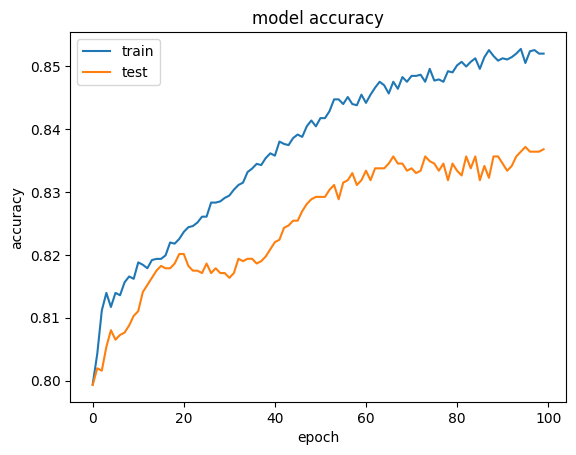

In [30]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

summarize history for loss

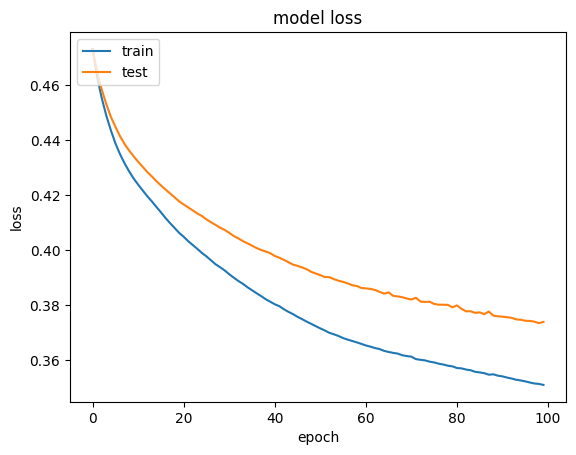

In [31]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

In [32]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1503,   92],
       [ 220,  185]])

In [34]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.844